# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Tasya Nadila
- **Email:** tasyanadila28012004@gmail.com
- **ID Dicoding:** tasyanadila

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca (weather situation) mempengaruhi tingkat kenaikan ataupun penurunan jumlah rata-rata sewa sepeda? dan bagaimana impactnya ditahun 2011 dan 2012, apakah ada perbedaan?
- Bagaimana tren penggunaan sepeda berubah setiap bulan dalam satu tahun tertentu?
- Pada musim (seasons) apa tingkat sewa sepeda (bike-riding) mendapat order terbanyak dalam tiap tahun (tahun 2011 dan 2012)?
- Bagaimana korelasi antara weekdays terhadp total order bike-riding berdasarkan kondisi cuaca?
- Bagaimana korelasi antara suhu (temperature) terhadp total order bike-riding berdasarkan musim?

## Import Packages/Library yang Digunakan

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [2]:
days_df = pd.read_csv("https://raw.githubusercontent.com/Tasyanadila/Proyek-Analisis-Data/main/Datasets/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# agar kita dapat memahami data dengan lebih baik, maka digunakan metode rename untuk mengubah nama kolom menjadi yang lebih jelas
column_mapping = {'dteday': 'date', 'yr': 'year', 'mnth':'month', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

# Use the rename method to rename the columns
days_df.rename(columns=column_mapping, inplace=True)
days_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/Tasyanadila/Proyek-Analisis-Data/main/Datasets/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# agar kita dapat memahami data dengan lebih baik, maka digunakan metode rename untuk mengubah nama kolom menjadi yang lebih jelas
column_mapping = {'dteday': 'date', 'yr': 'year', 'hr':'hour', 'mnth':'month', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

# Use the rename method to rename the columns
hours_df.rename(columns=column_mapping, inplace=True)
hours_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:

# Mengecek shape dari DataFrame 
print("Shape of the Hour DataFrame:", hours_df.shape)

# Mengecek apakah terdapat baris dengan nilai 'date' yang kosong
missing_dates = hours_df.loc[hours_df["date"].isnull()]

# Menampilkan beberapa baris pertama dari DataFrame hour
hours_df.head()


Shape of the Hour DataFrame: (17379, 17)


,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# Mengecek shape dari DataFrame 
print("Shape of the Days DataFrame:", days_df.shape)

# Mengecek apakah terdapat baris dengan nilai 'date' yang kosong
missing_dates = days_df.loc[hours_df["date"].isnull()]

# Menampilkan beberapa baris pertama dari DataFrame days
days_df.head()


Shape of the Days DataFrame: (731, 16)


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

### *Assessing Data Days*

In [8]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      731 non-null    int64  
 1   date         731 non-null    object 
 2   season       731 non-null    int64  
 3   year         731 non-null    int64  
 4   month        731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   weekday      731 non-null    int64  
 7   workingday   731 non-null    int64  
 8   weathersit   731 non-null    int64  
 9   temperature  731 non-null    float64
 10  atemp        731 non-null    float64
 11  humidity     731 non-null    float64
 12  windspeed    731 non-null    float64
 13  casual       731 non-null    int64  
 14  registered   731 non-null    int64  
 15  total        731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
days_df.isna().sum()

instant        0
date           0
season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weathersit     0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
total          0
dtype: int64

In [10]:
print("Jumlah duplikasi data: ", days_df.duplicated().sum())

Jumlah duplikasi data:  0


tidak terdapat data duplikasi dalam data days

In [11]:
days_df.describe()
     

,instant,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
days_df.nunique()

instant        731
date           731
season           4
year             2
month           12
holiday          2
weekday          7
workingday       2
weathersit       3
temperature    499
atemp          690
humidity       595
windspeed      650
casual         606
registered     679
total          696
dtype: int64

### *Assessing Data Hour*

In [13]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      17379 non-null  int64  
 1   date         17379 non-null  object 
 2   season       17379 non-null  int64  
 3   year         17379 non-null  int64  
 4   month        17379 non-null  int64  
 5   hour         17379 non-null  int64  
 6   holiday      17379 non-null  int64  
 7   weekday      17379 non-null  int64  
 8   workingday   17379 non-null  int64  
 9   weathersit   17379 non-null  int64  
 10  temperature  17379 non-null  float64
 11  atemp        17379 non-null  float64
 12  humidity     17379 non-null  float64
 13  windspeed    17379 non-null  float64
 14  casual       17379 non-null  int64  
 15  registered   17379 non-null  int64  
 16  total        17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
hours_df.isna().sum()

instant        0
date           0
season         0
year           0
month          0
hour           0
holiday        0
weekday        0
workingday     0
weathersit     0
temperature    0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
total          0
dtype: int64

In [15]:
print("Jumlah duplikasi data: ", hours_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak terdapat data duplikasi dalam data hours

In [16]:
hours_df.describe()
     

,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
hours_df.nunique()

instant        17379
date             731
season             4
year               2
month             12
hour              24
holiday            2
weekday            7
workingday         2
weathersit         4
temperature       50
atemp             65
humidity          89
windspeed         30
casual           322
registered       776
total            869
dtype: int64

### Cleaning Data

#### Data bike ini sudah bagus dan tidak memiliki data duplikasi ataupun missing value, jadi tidak perlu dilakukan proses cleaning lagi karena datanya sudah siap dipakai.

In [18]:
#Mengubah tipe data di beberapa kolom dataframe days_df
days_df['date'] = pd.to_datetime(days_df['date'])
categorical_columns = ['season', 'month', 'year', 'holiday', 'weekday', 'workingday', 'weathersit']
days_df[categorical_columns] = days_df[categorical_columns].astype('category')

#Mengubah tipe data di beberapa kolom dataframe hours_df
hours_df['date'] = pd.to_datetime(days_df['date'])
categorical_columns = ['season', 'month', 'year', 'holiday', 'weekday', 'workingday', 'weathersit']
hours_df[categorical_columns] = hours_df[categorical_columns].astype('category')


In [19]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         731 non-null    datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weathersit   17379 non-null  category      
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

In [20]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weathersit   731 non-null    category      
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: categ

## Exploratory Data Analysis (EDA)

#### Explore days_df

In [21]:
days_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
327,328,2011-11-24,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495
624,625,2012-09-16,3,1,9,0,0,0,1,0.580000,0.563125,0.570000,0.090183,2166,5167,7333
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498
218,219,2011-08-07,3,0,8,0,0,0,1,0.742500,0.715292,0.752917,0.201487,1298,2487,3785
347,348,2011-12-14,4,0,12,0,3,1,2,0.317500,0.338362,0.663750,0.060958,178,3562,3740


In [22]:
#mengubah value season ke nama yang sebenarnya, untuk memudahkan pemahaman terhadap DAILY dataframe
#sesuai dengan kriteria yang ada di readme.txt
days_df['season'] = days_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# konversi nilai year
days_df['year'] = days_df['year'].cat.rename_categories({0:2011, 1:2012})

# Konversi nilai untuk kolom 'month' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
days_df['month'] = days_df['month'].cat.rename_categories({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
days_df['weathersit'] = days_df['weathersit'].cat.rename_categories({1:'clear', 2:'Misty',3:'Light_RainSnow',4:'Heavy_RainSnow'})

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
days_df['weekday'] = days_df['weekday'].cat.rename_categories({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
days_df['workingday'] = days_df['workingday'].cat.rename_categories({0:'No', 1:'Yes'})

#### Explore hours_df

In [23]:
hours_df.sample(5)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
6001,6002,NaT,3,0,9,15,0,1,1,1,0.74,0.6667,0.48,0.0896,60,152,212
13176,13177,NaT,3,1,7,5,0,0,0,1,0.78,0.7424,0.62,0.0000,1,5,6
2807,2808,NaT,2,0,5,21,0,0,0,2,0.46,0.4545,0.82,0.0000,23,82,105
516,517,2012-05-31,1,0,1,15,0,0,0,1,0.16,0.1364,0.28,0.3582,13,64,77
7436,7437,NaT,4,0,11,11,1,5,0,1,0.34,0.2879,0.42,0.4925,20,150,170


In [24]:
#mengubah value season ke nama yang sebenarnya, untuk memudahkan pemahaman terhadap hourly dataframe
#sesuai dengan kriteria yang ada di readme.txt
hours_df['season'] = hours_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
hours_df['season'].unique()

['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Winter', 'Spring', 'Summer', 'Autumn']

In [25]:
# konversi nilai year
hours_df['year'] = hours_df['year'].cat.rename_categories({0:2011, 1:2012})
hours_df['year'].unique()

[2011, 2012]
Categories (2, int64): [2011, 2012]

In [26]:
# Konversi nilai untuk kolom 'month' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hours_df['month'] = hours_df['month'].cat.rename_categories({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
hours_df['month'].unique()


['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [27]:
# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hours_df['weathersit'] = hours_df['weathersit'].cat.rename_categories({1:'clear', 2:'Misty',3:'Light_RainSnow',4:'Heavy_RainSnow'})
hours_df['weathersit'].unique()


['clear', 'Misty', 'Light_RainSnow', 'Heavy_RainSnow']
Categories (4, object): ['clear', 'Misty', 'Light_RainSnow', 'Heavy_RainSnow']

In [28]:
# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hours_df['weekday'] = hours_df['weekday'].cat.rename_categories({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
hours_df['weekday'].unique()


['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Categories (7, object): ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [29]:
# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
hours_df['workingday'] = hours_df['workingday'].cat.rename_categories({0:'No', 1:'Yes'})
hours_df['workingday'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kondisi cuaca (weather situation) mempengaruhi tingkat kenaikan ataupun penurunan jumlah rata-rata sewa sepeda? dan bagaimana impactnya ditahun 2011 dan 2012, apakah ada perbedaan?

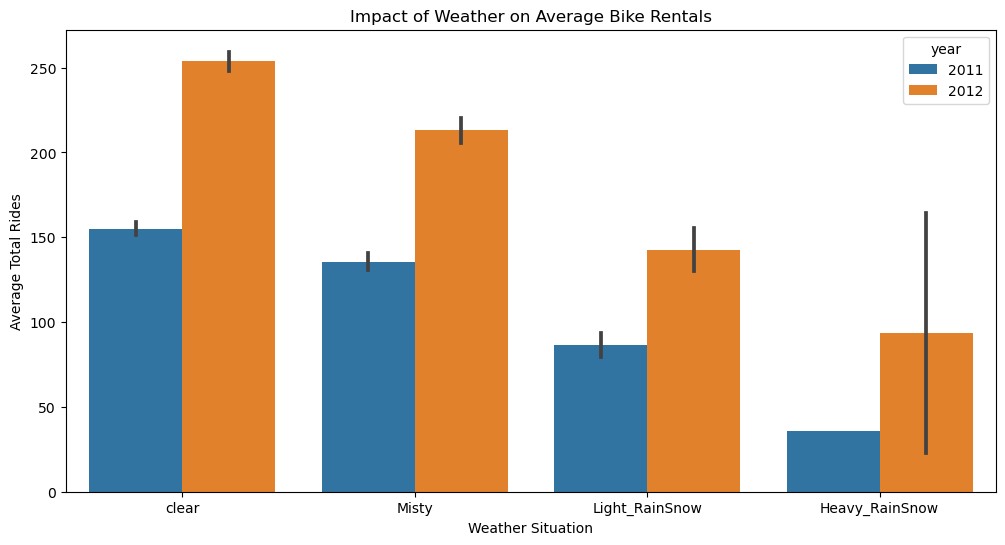

In [30]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot using the sn.barplot() function
sn.barplot(
    x="weathersit",  # Kolom kondisi cuaca sebagai x
    y="total",  # Kolom jumlah total sewa sepeda sebagai y
    data=hours_df,
    hue="year"
)

# Add labels and a title to the plot
plt.xlabel("Weather Situation")
plt.ylabel("Average Total Rides")
plt.title("Impact of Weather on Average Bike Rentals")

# Show the plot
plt.show()

 ### Pertanyaan 2: Bagaimana tren penggunaan sepeda berubah setiap bulan dalam satu tahun tertentu?

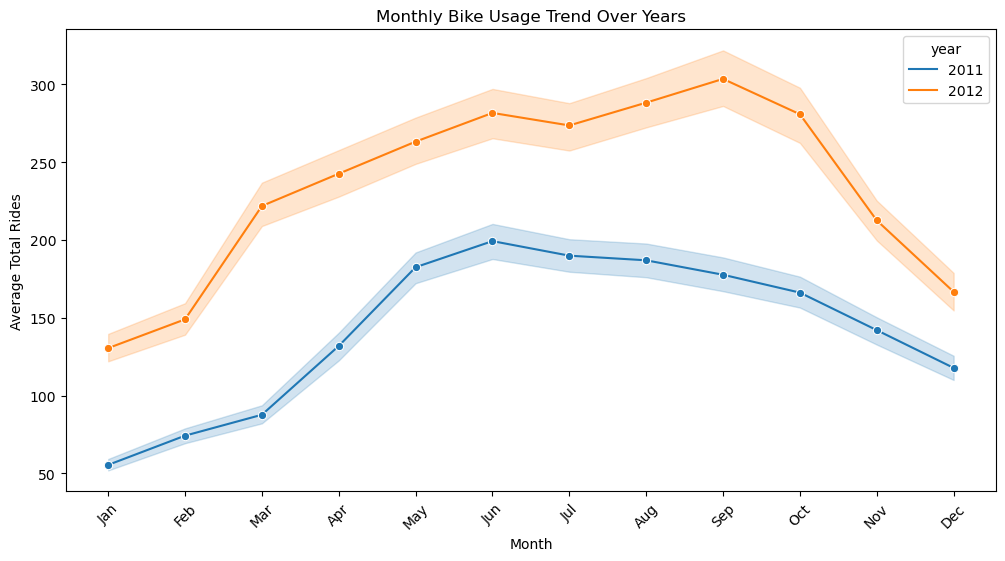

In [31]:
# Setting figsize
plt.figure(figsize=(12, 6))

# membuat linechart dengan fungsi sn.lineplot
sn.lineplot(
    x="month",    # Kolom bulan
    y="total",    # Kolom jumlah total pesanan sepeda
    data=hours_df,
    hue="year",   # Pisahkan garis berdasarkan tahun
    marker='o',   # Menambahkan marker di setiap titik
)

# menambahkan label
plt.xlabel("Month")
plt.ylabel("Average Total Rides")
plt.title("Monthly Bike Usage Trend Over Years")

# menampilkan plot
plt.xticks(rotation=45)  
plt.show()

 ### Pertanyaan 3: Pada musim (seasons) apa tingkat sewa sepeda (bike-riding) mendapat order terbanyak dalam tiap tahun (tahun 2011 dan 2012)?

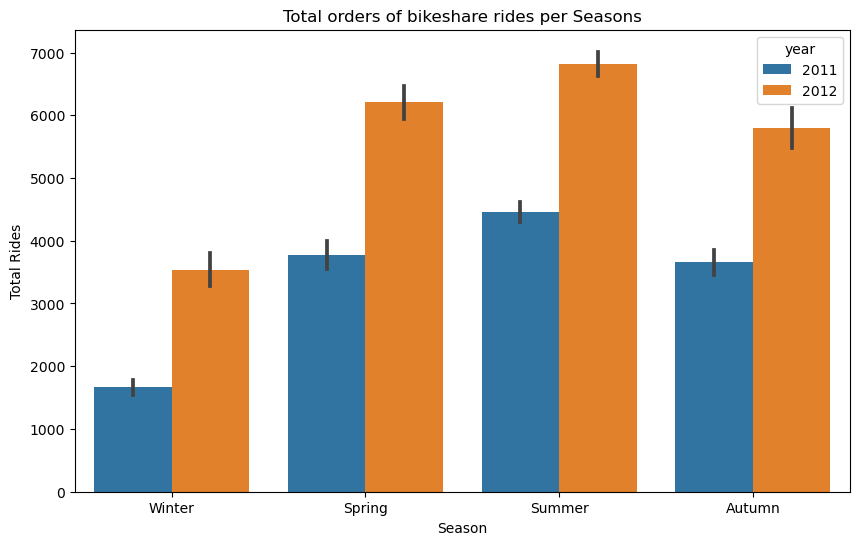

In [32]:
plt.figure(figsize=(10,6))

sn.barplot(x='season', y='total', data=days_df, hue='year')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total orders of bikeshare rides per Seasons")

plt.show()

### Pertanyaan 4:  Bagaimana korelasi antara weekdays terhadap total order bike-riding berdasarkan kondisi cuaca?

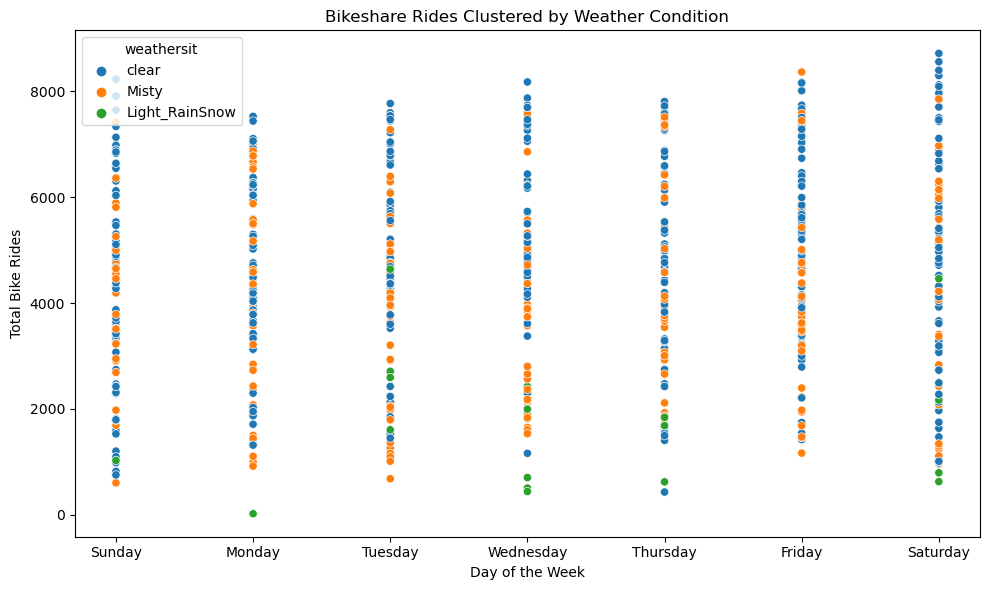

In [33]:
plt.figure(figsize=(10,6))

sn.scatterplot(x='weekday', y='total', data=days_df, hue='weathersit')

plt.xlabel("Day of the Week")
plt.ylabel("Total Bike Rides")
plt.title("Bikeshare Rides Clustered by Weather Condition")

# Show the plot
plt.tight_layout()
plt.show()

### Pertanyaan 5:  Bagaimana korelasi antara suhu (temperature) terhadp total order bike-riding berdasarkan musim?

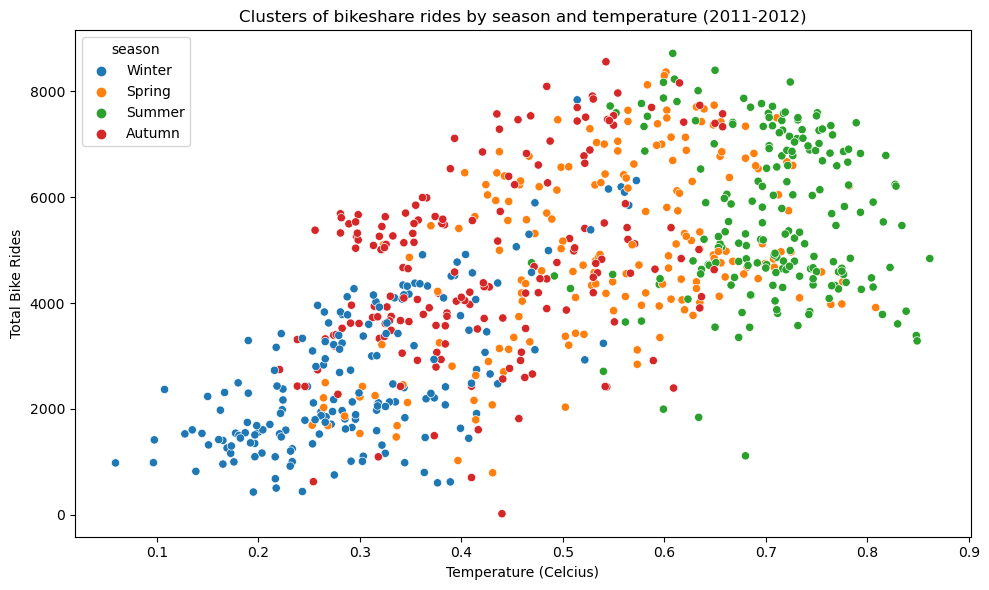

In [34]:
plt.figure(figsize=(10,6))

sn.scatterplot(x='temperature', y='total', data=days_df, hue='season')

plt.xlabel("Temperature (Celcius)")
plt.ylabel("Total Bike Rides")
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

## Conclusion

 ### Conclution pertanyaan 1 
      Dari hasil visualisasi untuk pertanyaan 1 diatas aalah benar bahwa kondisi cuaca (weather situation) mempengaruhi tingkat kenaikan ataupun penurunan jumlah rata-rata sewa sepeda. Kemudian ada sedikit perbedaan impact di thaun 2011 dan 2012. Dari visualisasi diketahui bahwa pada cuaca cerah(clear) rata-rata sewa sepeda tinggi ditahun 2012 dan 2011, sedangkan di cuaca misty dan lightrain/snow rata-rata sewa sepeda turun, dan di cuaca heavy rain rata-rata sewa sepada sangatlah rendah di tahun 2011 dan 2012.
  
  ### Conclution pertanyaan 2
      Trend penggunaan sepede relatif sama ditahun 2011 dan 2012, namun ditahun 2012 trend penggunaan sepeda lebih tinggi.
  
  ### conclution pertanyaan 3
      Musim panas (summer) merupakan musim dengan order sewa sepeda terbanyak di tahun 2011 dan 2012. Cuaca yang cerah, hangat, dan indah menjadi faktor utama yang mendorong tingginya order pada musim ini.

  ### Conclusion pertanyaan 4
      Cuaca cerah dan weekdays (Senin - Jum'at) merupakan kondisi yang paling ideal untuk bike-riding, sehingga menghasilkan total order tertinggi. Hujan lebat, baik weekdays (senin-jum'at) maupun weekend (sabtu-minggu), merupakan kondisi yang paling tidak ideal untuk bike-riding, sehingga menghasilkan total order terendah. Diketahui bahwa korelasi antara weekdays dan total order bike-riding dipengaruhi oleh kondisi cuaca.

  ### Conclusion pertanyaan 5
      order bike-sharing memiliki nilai maksimum di summer dan nilai minimum di winter. Visualisasi yang ditampilkan sejalan dengan visualisasi yang ada di pertanyaan nomor 3. Dari hasil korelasi pertanyaan nomor 5 disimpulkan bahwa seiring dengan meningkatnya temperature orderan bike-sharing juga akan meningkat, puncaknya ada di musim summer.
  